In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from  sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
import statsmodels
import statsmodels.api as sm


In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

In [1]:
vac=pd.read_csv(r"D:\ml\logistic\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv")
vac.head()

SyntaxError: EOL while scanning string literal (4145916372.py, line 1)

In [5]:
vac.shape

(26707, 34)

In [6]:
vac.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
for col in ['h1n1_worry','h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
            'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition','cont_child_undr_6_mnths',
           'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']:
    vac[col]=vac[col].astype('object')
    



In [8]:
vac.dtypes

unique_id                     int64
h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [9]:
vac.drop('unique_id' ,axis=1 , inplace=True)

In [10]:
vac.shape

(26707, 33)

In [11]:
vac_features=vac.iloc[:,vac.columns !='h1n1_vaccine']
vac_target=vac.iloc[:,vac.columns =='h1n1_vaccine']

In [12]:
vac_features.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,24547.0,24547.0,25736.0,25887.0,25903.0,14433.0,26316.0,26319.0,26312.0,26245.0,26193.0,26170.0,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.0,26458.0
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5,4,4,2,3,2,2,3,3,4.0,4.0
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
freq,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,19139.0,16453.0,18446.0,23749.0,23004.0,12697.0,11683.0,9919.0,9129.0,11629.0,8954.0,11870.0,6843,10097,21222,15858,12777,13555,18736,13560,11645,14474.0,18672.0


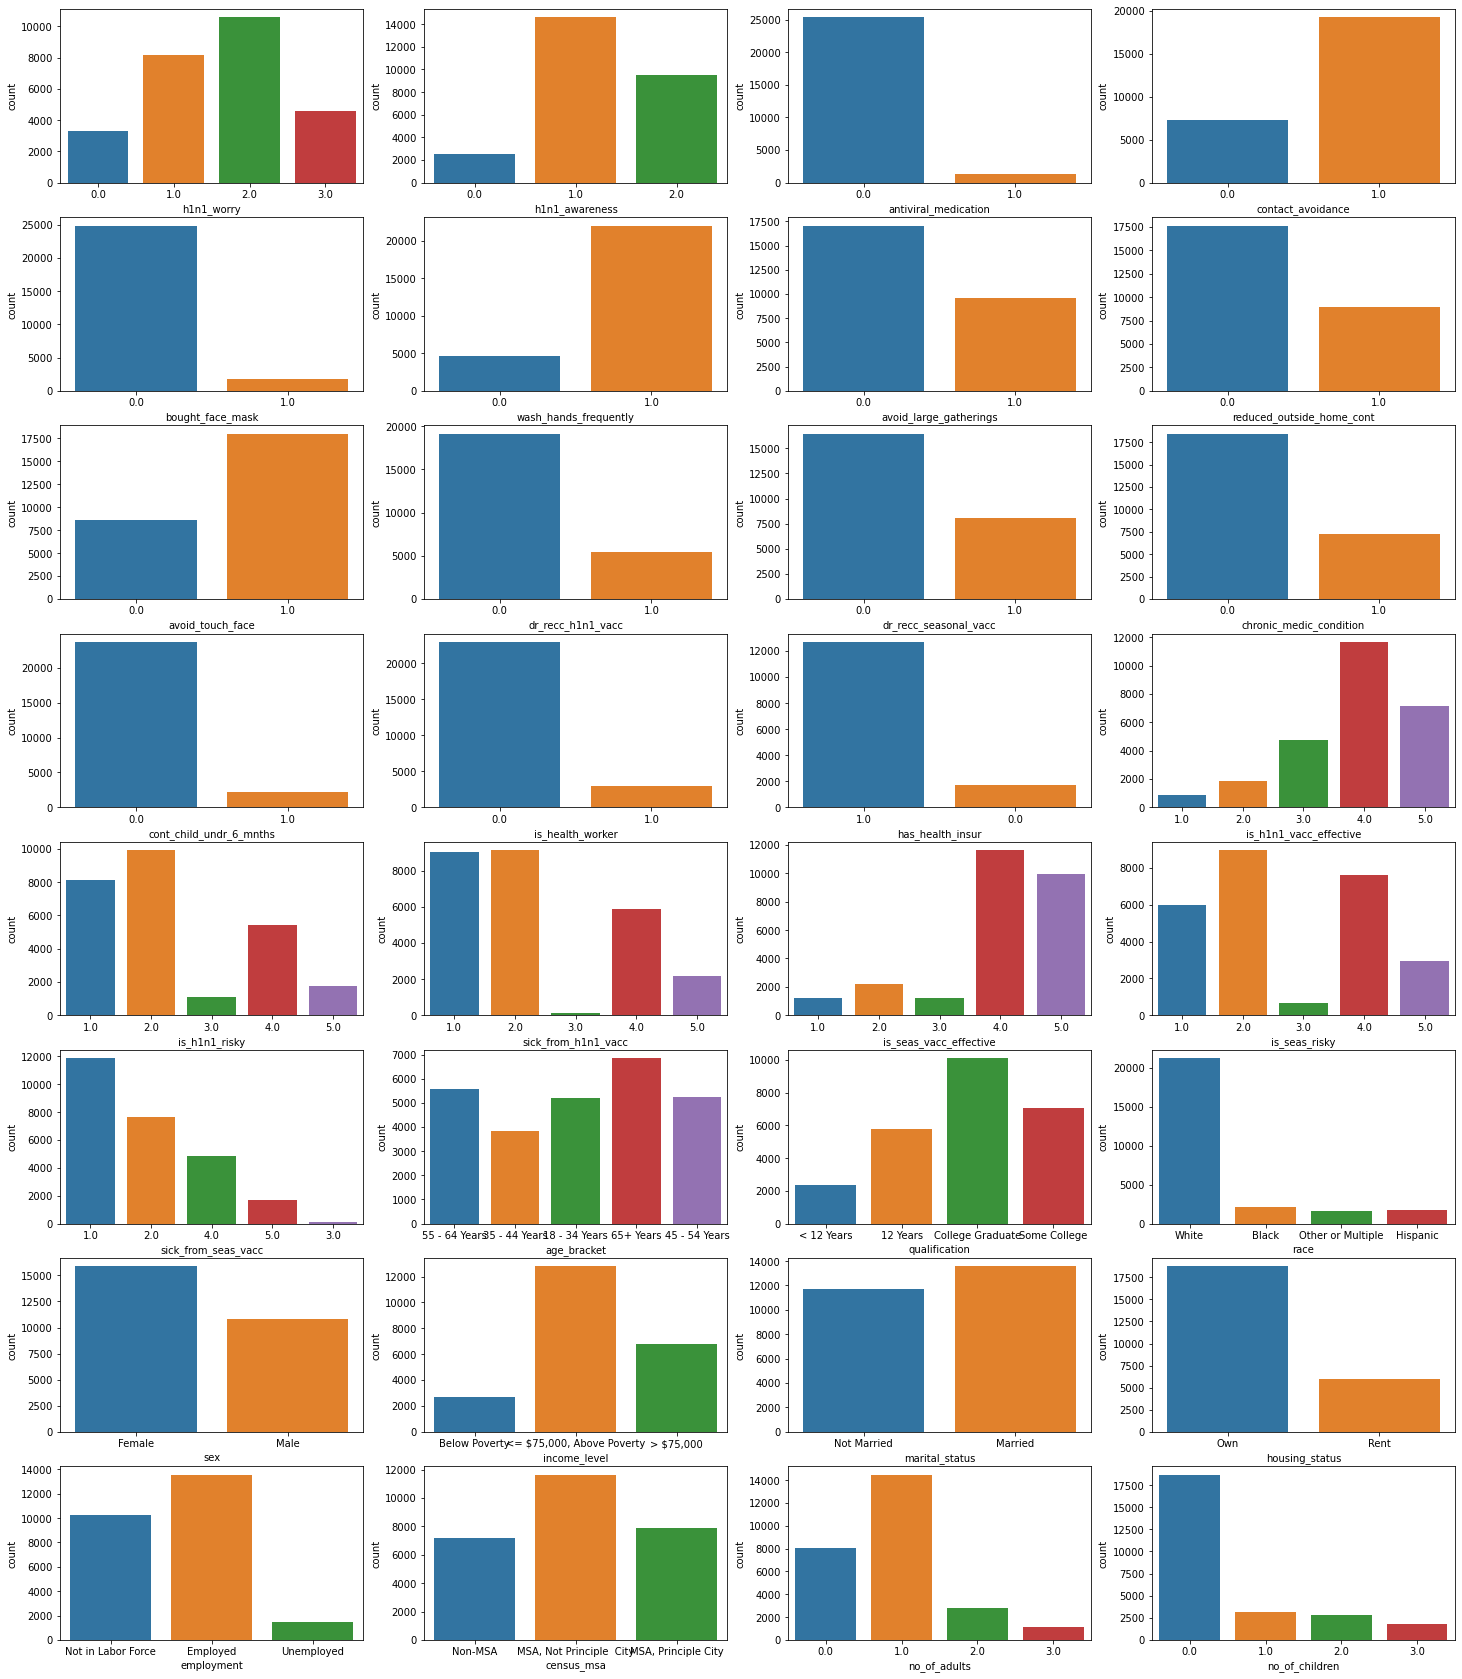

In [13]:
categorical=[]
for column in vac_features:
    if is_string_dtype(vac_features[column]):
        categorical.append(column)

fig, ax=plt.subplots(nrows = 8 ,ncols = 4 , figsize=(25,30))
for variable, subplot in zip(categorical , ax.flatten()):
    sns.countplot(vac[variable], ax=subplot)
plt.show()

In [14]:
freq=vac_target.h1n1_vaccine.value_counts()
freq

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

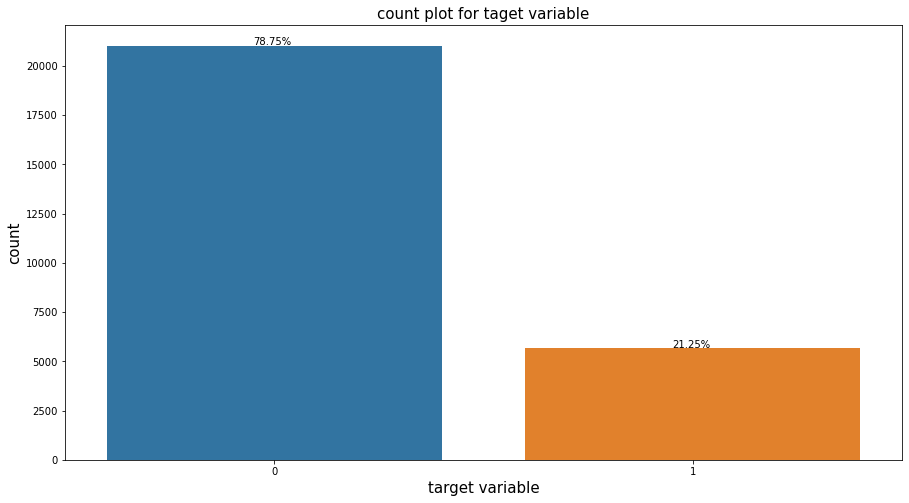

In [15]:
sns.countplot(x=vac_target.h1n1_vaccine)
plt.text(x= -0.05 , y=vac_target.h1n1_vaccine.value_counts()[0]+30,
        s= str(round((freq[0])*100/len(vac_target.h1n1_vaccine),2))  + '%' )
plt.text(x= 0.95 , y=vac_target.h1n1_vaccine.value_counts()[1]+20,
        s= str(round((freq[1])*100/len(vac_target.h1n1_vaccine),2))  + '%' )
plt.title("count plot for taget variable", fontsize=15)
plt.xlabel("target variable",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.show()

In [16]:
total= vac.isnull().sum().sort_values(ascending=False)
percent=(vac.isnull().sum()*100/vac.isnull().count()).sort_values(ascending = False)

missing=pd.concat([total,percent],axis=1 , keys = ['total','prcnt of missing val'])
missing

,total,prcnt of missing val
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


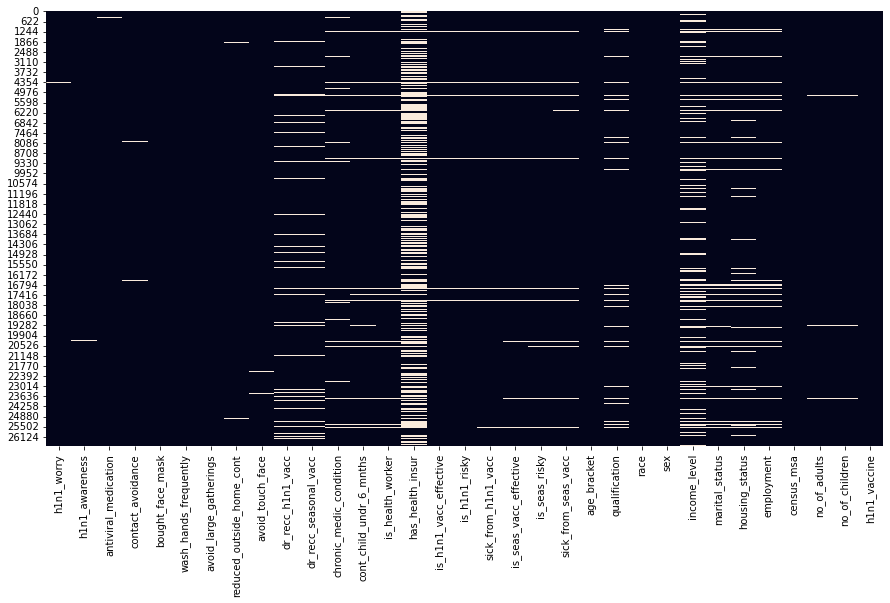

In [18]:
vac.drop(['has_health_insur','income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc'],axis=1 , inplace=True)

In [19]:
vac.shape

(26707, 29)

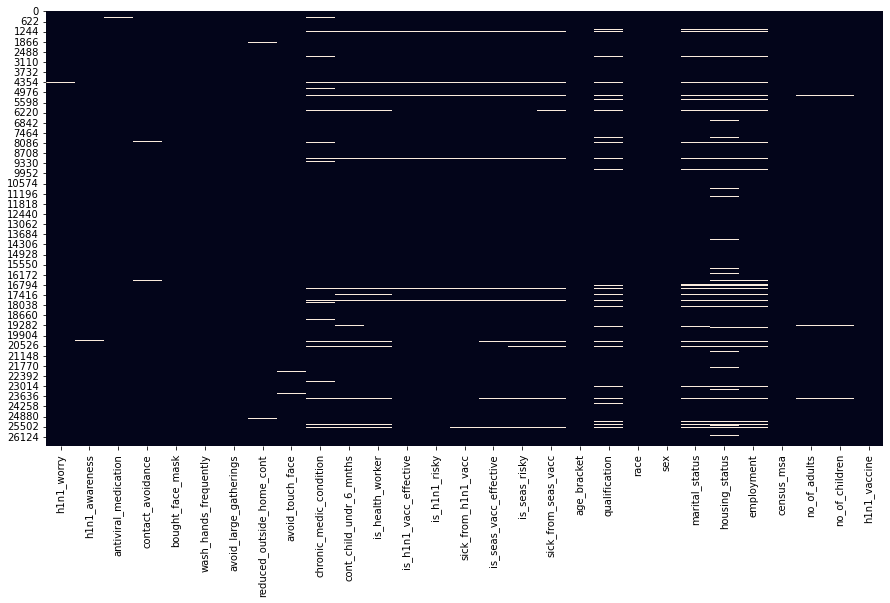

In [20]:
sns.heatmap(vac.isnull(), cbar=False)
plt.show()

In [21]:
vac.dropna(axis=0,inplace=True)

In [22]:
vac.shape

(23426, 29)

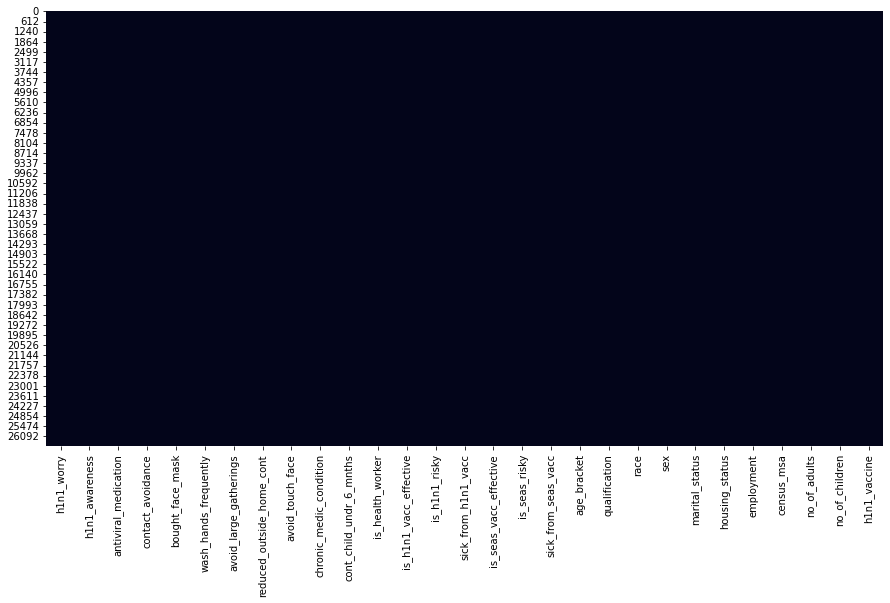

In [23]:
sns.heatmap(vac.isnull(), cbar=False)
plt.show()

In [24]:
vac.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [25]:
vac.dtypes

h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
marital_status               object
housing_status               object
employment                   object
census_msa                   object
no_of_adults                 object
no_of_children              

In [26]:
Cat=[]
for column in vac:
    if is_string_dtype(vac[column]):
        Cat.append(column)

In [27]:
df_cat = vac[Cat]
df_num = vac.drop(Cat , axis=1)

In [28]:
df_cat.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [29]:
vacdum= pd.get_dummies( df_cat, drop_first=True)

In [30]:
vacdum.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
vacdum.shape

(23426, 62)

In [32]:
y=pd.DataFrame(df_num)

In [33]:
x=pd.DataFrame(vacdum)

In [34]:
x.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [35]:
x.shape

(23426, 62)

In [36]:
def gettestreport (model):
    return(classification_report(y_test, y_pred))

In [37]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

In [38]:
def plot_confusion_matrix(model):
    cm= confusion_matrix(y_test , y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',],
                              index=['Actual:0','Actual:1']) 
    sns.heatmap(conf_matrix , annot= True , fmt='d' , cmap= ListedColormap(['lightskyblue']),
               cbar=False , linewidths = 0.1 , annot_kws = { 'size':25})
    plt.xticks(fontsize =20)
    plt.yticks(fontsize = 20)
    plt.show()

In [39]:
def plt_roc(model):
    fpr, tpr , _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title('roc curve for h1n1 vac classifier' , fontsize = 15)
    plt.xlabel( ' False positive rate (1-specficity)' , fontsize =15)
    plt.ylabel( ' true positive rate (sensitivity)' , fontsize =15)
    plt.text (x= 0.02, y=0.9 , s=('auc score:',round(roc_auc_score(y_test , y_pred_prob),4)))
    plt.grid(True)


    

In [40]:
score_card = pd.DataFrame(columns=["Model", "AUC score", "Precision Score", "Recall Score", 
                                  "Accuracy Score", "Kappa Score", "f1 Score"])

def update_score_card(model_name):
    
    global score_card
    
    score_card = score_card.append({"Model" : model_name,
                                   "AUC score" : roc_auc_score(y_test, y_pred_prob),
                                   "Precision Score" : metrics.precision_score(y_test, y_pred),
                                   "Recall Score" : metrics.recall_score(y_test, y_pred),
                                   "Accuracy Score" : metrics.accuracy_score(y_test, y_pred),
                                   "Kappa Score" : cohen_kappa_score(y_test, y_pred),
                                   "f1 Score": metrics.f1_score(y_test, y_pred)},
                                   ignore_index=True)
    return(score_card)

In [41]:
x = sm.add_constant(x)
x.head()

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,1.0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
 x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16398, 63), (7028, 63), (16398, 1), (7028, 1))

In [43]:
 log_reg_model = sm.Logit(y_train , x_train).fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.414325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                16398
Model:                          Logit   Df Residuals:                    16335
Method:                           MLE   Df Model:                           62
Date:                Sun, 05 Feb 2023   Pseudo R-squ.:                  0.1990
Time:                        14:33:26   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -8482.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4648      0.297    -15.041     

In [44]:
 y_pred_prob = log_reg_model.predict(x_test)
y_pred_prob.head()

9480     0.193582
25478    0.663039
16789    0.091390
8036     0.121057
7121     0.156698
dtype: float64

In [45]:
y_pre=[ '0' if x< 0.5 else '1' for x in y_pred_prob]

In [46]:
 y_pred = np.array(y_pre , dtype = np.float32)
y_pred[0:5]

array([0., 1., 0., 0., 0.], dtype=float32)

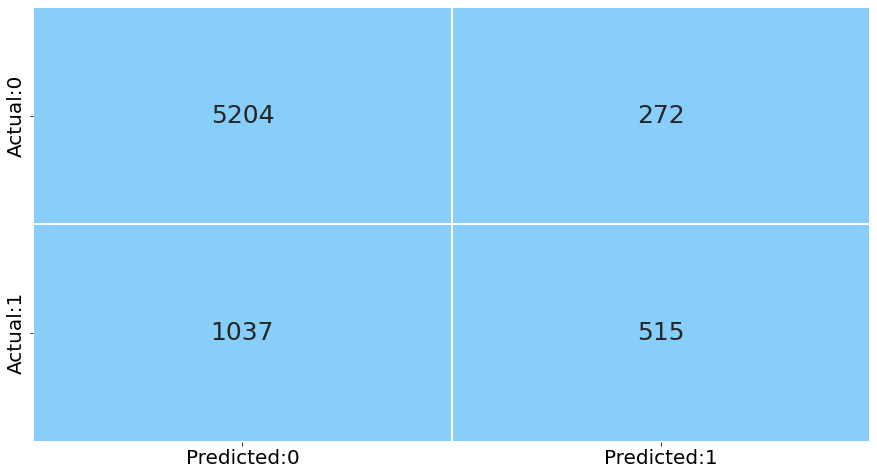

In [47]:
plot_confusion_matrix(log_reg_model)

In [48]:
test = gettestreport(log_reg_model)
print(test)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5476
           1       0.65      0.33      0.44      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.64      0.66      7028
weighted avg       0.79      0.81      0.79      7028



In [49]:
kappa = kappa_score(log_reg_model) 
print(kappa)

0.3426774787926872


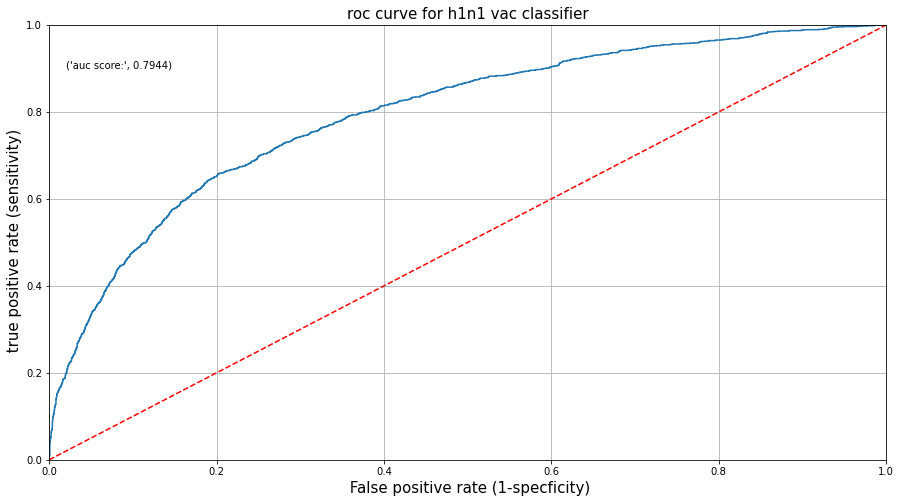

In [50]:
 plt_roc(log_reg_model)

In [51]:
update_score_card(model_name= 'logist reg')

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,logist reg,0.794406,0.654384,0.33183,0.813745,0.342677,0.440359


In [52]:
sgd = SGDClassifier(loss = 'log', random_state = 10)
logreg_with_sgd = sgd.fit(x_train , y_train)

In [60]:
 y_pred_prob1 = logreg_with_sgd.predict_proba(x_test)
y_pred_prob1

array([[0.85589947, 0.14410053],
       [0.36519826, 0.63480174],
       [0.90469511, 0.09530489],
       ...,
       [0.48383949, 0.51616051],
       [0.97587223, 0.02412777],
       [0.78488601, 0.21511399]])

In [61]:
 y_pred = logreg_with_sgd.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

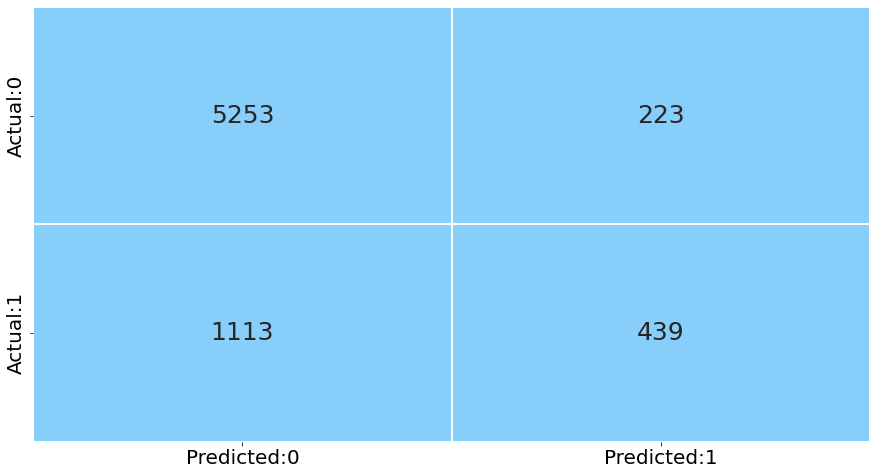

In [62]:
plot_confusion_matrix(logreg_with_sgd)

In [63]:
test = gettestreport(logreg_with_sgd)
print(test)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5476
           1       0.66      0.28      0.40      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.62      0.64      7028
weighted avg       0.79      0.81      0.78      7028



In [64]:
kappa = kappa_score(logreg_with_sgd) 
print(kappa)

0.30475321107275866


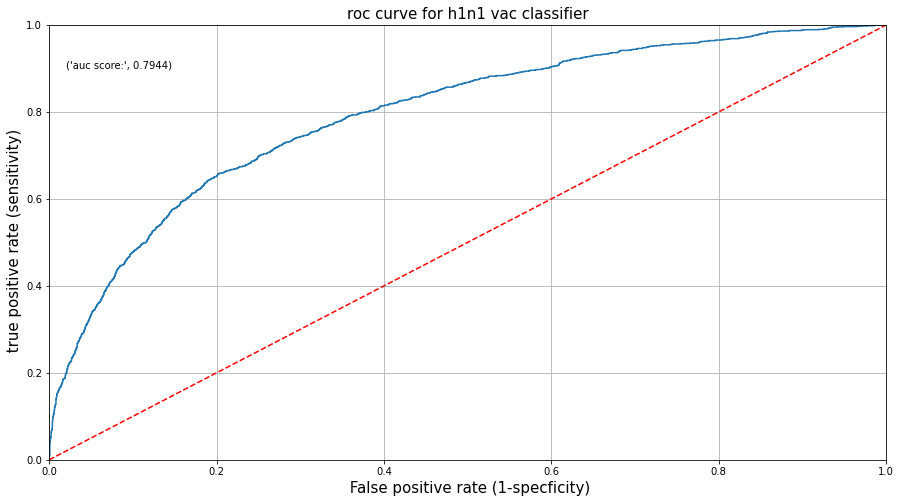

In [65]:
plt_roc(logreg_with_sgd)

In [59]:
update_score_card(model_name= 'logist reg with sgd')

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,logist reg,0.794406,0.654384,0.33183,0.813745,0.342677,0.440359
1,logist reg with sgd,0.794406,0.663142,0.282861,0.809903,0.304753,0.396567


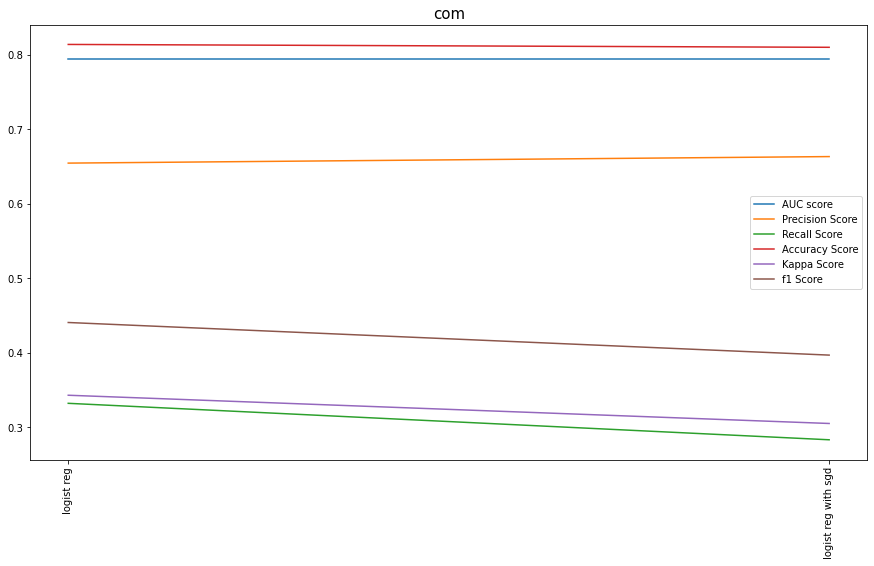

In [66]:
score_card.plot()
plt.title(label = "com" , fontsize = 15)
plt.xticks([0,1], list(score_card.Model), rotation = 'vertical')
plt.show()